<a href="https://colab.research.google.com/github/amir-masoud/RL/blob/main/TD_control_off_policy_Q_learning_gym_FrozenLake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


{(0, 0): 0.459610052718371, (0, 1): 0.46540639797768224, (0, 2): 0.46474659442081623, (0, 3): 0.40635836030939626, (1, 0): 0.0, (1, 1): 0.038789660867644404, (1, 2): 0.05991486865267409, (1, 3): 0.3678469423491846, (2, 0): 0.0, (2, 1): 0.12599712403376717, (2, 2): 0.1266695308520827, (2, 3): 0.14951842388400757, (3, 0): 0.0, (3, 1): 0.2072688991362956, (3, 2): 0.005304025102566556, (3, 3): 0.17060024616934807, (4, 0): 0.5165806672329659, (4, 1): 0.45621976573597417, (4, 2): 0.5108114572610486, (4, 3): 0.0, (5, 0): 0.0, (5, 1): 0.0, (5, 2): 0.0, (5, 3): 0.0, (6, 0): 0.0, (6, 1): 0.58642018829177, (6, 2): 0.014516459120114303, (6, 3): 0.0, (7, 0): 0.0, (7, 1): 0.0, (7, 2): 0.0, (7, 3): 0.0, (8, 0): 0.061923650255651164, (8, 1): 0.5921151180617229, (8, 2): 0.027327037419808603, (8, 3): 0.0, (9, 0): 0.0, (9, 1): 0.489175076294491, (9, 2): 0.6695608960018687, (9, 3): 0.0, (10, 0): 0.0, (10, 1): 0.01675053126475369, (10, 2): 0.019494920375478897, (10, 3): 0.0, (11, 0): 0.0, (11, 1): 0.0, (11

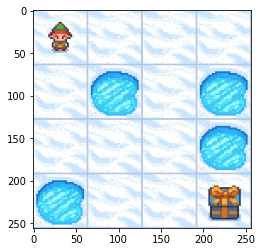

In [2]:
!pip install pygame
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1

from pyvirtualdisplay import Display
import gym
import pygame
import numpy as np
import random
import matplotlib.pyplot as plt

# display requierments
display = Display(visible=0, size=(400, 300))
display.start()

# initializing variables
alpha = 0.85  # learning rate
gamma = 0.9  # discount factor
epsilon = 0.8  # epsilon for using epsilon greedy

num_episodes = 50000
num_timesteps = 1000

# defining epsilon_greedy method
def epsilon_greedy(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # in epsilon case returnning a random action
    else:
        return max(list(range(env.action_space.n)), key=lambda x: Q[(s, a)])  # returnning the max Q in the state

Q = {}
env = gym.make("FrozenLake-v1")
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for s in range(env.observation_space.n):
  for a in range(env.action_space.n):
    Q[(s,a)] = 0.0

for i in range(num_episodes):
    s = env.reset()
    a = epsilon_greedy(s, epsilon)
    for t in range(num_timesteps):
        s_, r, done,info = env.step(a)
        # the line below is the difference with SARSA
        a_ = a_ = np.argmax([Q[(s_, a)] for a in range(env.action_space.n)])
        Q[(s, a)] = Q[(s, a)]+(alpha * (r + gamma * Q[(s_, a_)] - Q[(s, a)]))
        s = s_
        if done:
            break
print(Q)
print("end")


